<a href="https://colab.research.google.com/github/munnathecat/Session-5/blob/master/Assignment_5_copy_of_EIGHTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


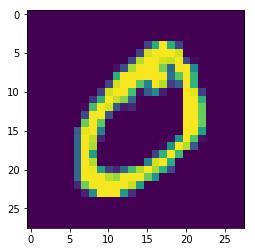

In [79]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [82]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


# generator to standardize images
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate mean on training dataset
datagen.fit(X_train)
# prepare an iterators to scale images
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64,shuffle=False)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

Batches train=938, test=157


In [83]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [84]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26 (3x3)
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #24 (5x5)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12 (10x10)

model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))#10 (12x12)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))#8 (14x14)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))#6 (16x16)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))#4 (18x18)
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 A

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_43 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_37 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 10)       

In [85]:
#Mounting google drive in colab to save model and misclassified image

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [86]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



#Store the model in the HDF5 file format
from google.colab import drive
drive.mount('/content/gdrive')

filepath=F"/content/gdrive/My Drive/weights.best.hdf5"


checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model.fit(train_iterator, epochs=40,
          steps_per_epoch=len(train_iterator),
          verbose=1,
          validation_data= test_iterator,
          validation_steps = len(test_iterator),
          callbacks=[checkpoint]
          )
          
          

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/40
938/938 [==============================] - 31s 34ms/step - loss: 1.0292 - acc: 0.8132 - val_loss: 0.5691 - val_acc: 0.9472

Epoch 00001: val_acc improved from -inf to 0.94720, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 2/40
938/938 [==============================] - 24s 25ms/step - loss: 0.4035 - acc: 0.8970 - val_loss: 0.1642 - val_acc: 0.9794

Epoch 00002: val_acc improved from 0.94720 to 0.97940, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 3/40
938/938 [==============================] - 24s 25ms/step - loss: 0.3228 - acc: 0.9153 - val_loss: 0.1312 - val_acc: 0.9847

Epoch 00003: val_acc improved from 0.97940 to 0.98470, saving model to /content/gdrive/My Drive/weights.best.hdf5
Epoch 4/40
938/938 [==============================] - 24s 25ms/step - loss: 0.2863 - acc: 0.9247 - val_loss: 0.1375 - val_acc

In [87]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[3.631985563278198, 0.3103]


In [88]:
#reload model and test it with the 10000 instances:

from keras.models import load_model
from keras.preprocessing.image import save_img
from sklearn.metrics import classification_report, confusion_matrix

#Load the best saved model and create predictions on the test set

mnist_model = load_model(filepath)

probabilities = mnist_model.predict_generator(test_iterator,steps=len(test_iterator))

print(probabilities[0])
y_pred = np.argmax(probabilities, axis=1)


#See which we predicted correctly and which not

correct_indices = np.nonzero(y_pred == y_test)[0] 
incorrect_indices = np.nonzero(y_pred != y_test)[0]
print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")




[3.4836876e-06 6.2675049e-06 3.5242983e-06 6.5347931e-06 1.2964917e-05
 3.2364630e-06 1.5958987e-05 9.9990261e-01 7.5028947e-06 3.7944596e-05]
9930  classified correctly
70  classified incorrectly


/content/gdrive/My Drive/test/0..jpg


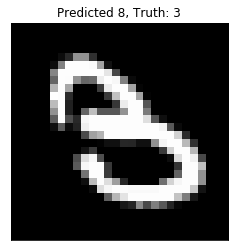

/content/gdrive/My Drive/test/1..jpg


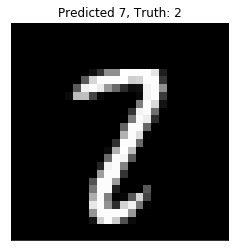

/content/gdrive/My Drive/test/2..jpg


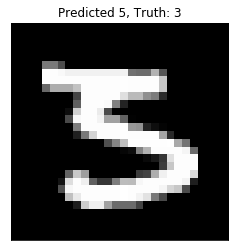

/content/gdrive/My Drive/test/3..jpg


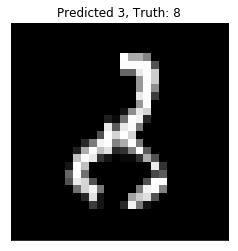

/content/gdrive/My Drive/test/4..jpg


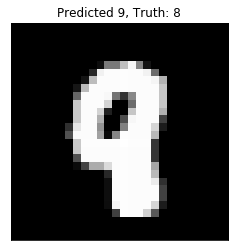

/content/gdrive/My Drive/test/5..jpg


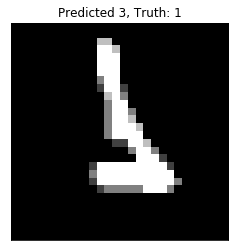

/content/gdrive/My Drive/test/6..jpg


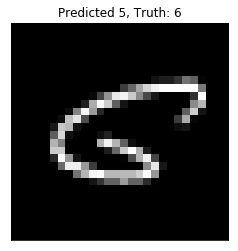

/content/gdrive/My Drive/test/7..jpg


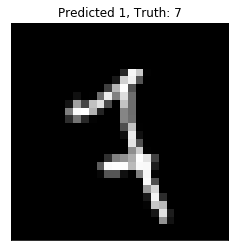

/content/gdrive/My Drive/test/8..jpg


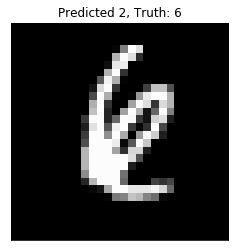

/content/gdrive/My Drive/test/9..jpg


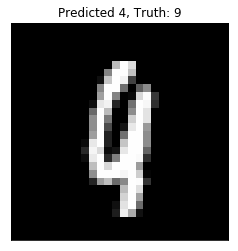

/content/gdrive/My Drive/test/10..jpg


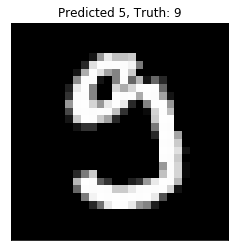

/content/gdrive/My Drive/test/11..jpg


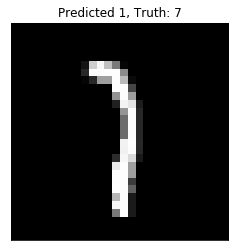

/content/gdrive/My Drive/test/12..jpg


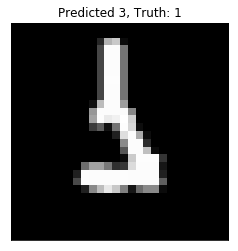

/content/gdrive/My Drive/test/13..jpg


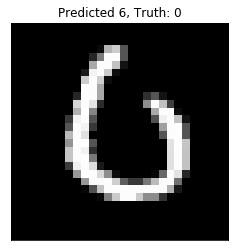

/content/gdrive/My Drive/test/14..jpg


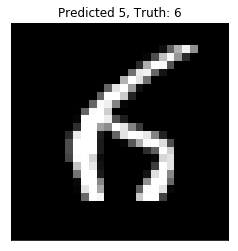

/content/gdrive/My Drive/test/15..jpg


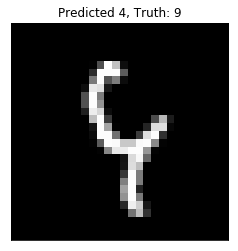

/content/gdrive/My Drive/test/16..jpg


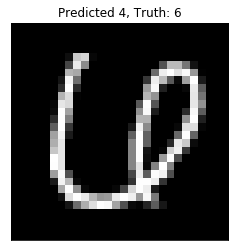

/content/gdrive/My Drive/test/17..jpg


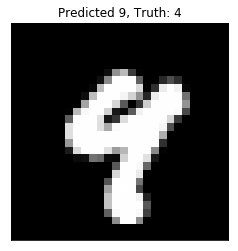

/content/gdrive/My Drive/test/18..jpg


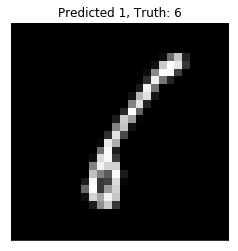

/content/gdrive/My Drive/test/19..jpg


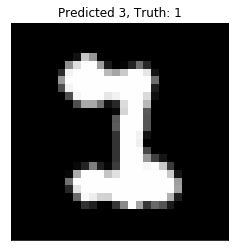

/content/gdrive/My Drive/test/20..jpg


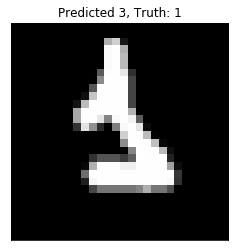

/content/gdrive/My Drive/test/21..jpg


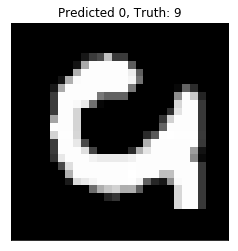

/content/gdrive/My Drive/test/22..jpg


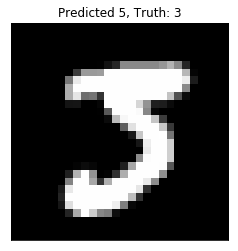

/content/gdrive/My Drive/test/23..jpg


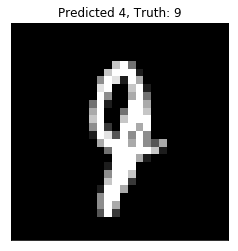

/content/gdrive/My Drive/test/24..jpg


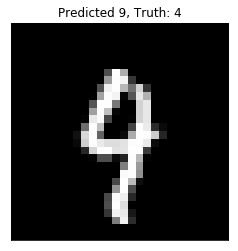

In [89]:
# plot and save 25 images incorrect predictions to Drive


for i, incorrect in enumerate(incorrect_indices[:25]):

  filepath2="{}{}.{}".format(F"/content/gdrive/My Drive/test/",i,".jpg")
  
  print(filepath2)
  
  save_img(filepath2, X_test[incorrect])

  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')

  plt.title( "Predicted {}, Truth: {}".format(y_pred[incorrect], y_test[incorrect]))

  plt.xticks([])

  plt.yticks([])

  plt.show()